In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import mpl_toolkits
mpl_toolkits.__path__.append('/usr/lib/python2.7/dist-packages/mpl_toolkits/')
from mpl_toolkits.basemap import Basemap

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


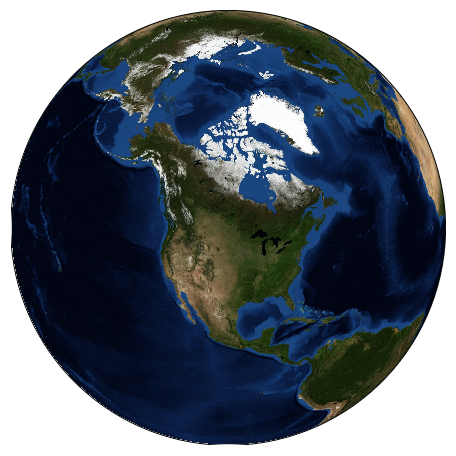

In [10]:
plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None, lat_0=50, lon_0=-100)
m.bluemarble(scale=0.5);

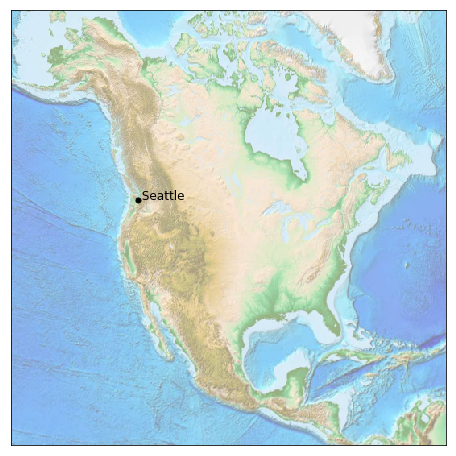

In [11]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
width=8E6, height=8E6,
lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)
# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, ' Seattle', fontsize=12);

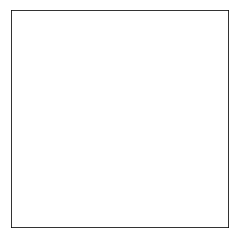

In [13]:
from itertools import chain
def draw_map(m, scale=0.2):
# draw a shaded-relief image
    m.shadedrelief(scale=scale)
# lats and longs are returned as a dictionary
lats = m.drawparallels(np.linspace(-90, 90, 13))
lons = m.drawmeridians(np.linspace(-180, 180, 13))
# keys contain the plt.Line2D instances
lat_lines = chain(*(tup[1][0] for tup in lats.items()))
lon_lines = chain(*(tup[1][0] for tup in lons.items()))
all_lines = chain(lat_lines, lon_lines)
# cycle through these lines and set the desired style
for line in all_lines:
    line.set(linestyle='-', alpha=0.3, color='w')

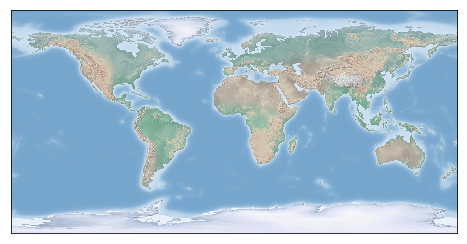

In [14]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
llcrnrlat=-90, urcrnrlat=90,
llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

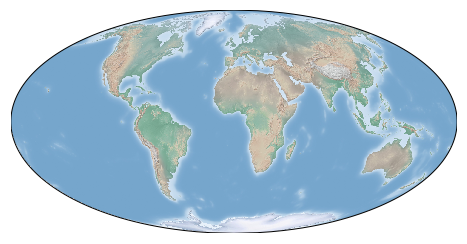

In [15]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='moll', resolution=None,
lat_0=0, lon_0=0)
draw_map(m)

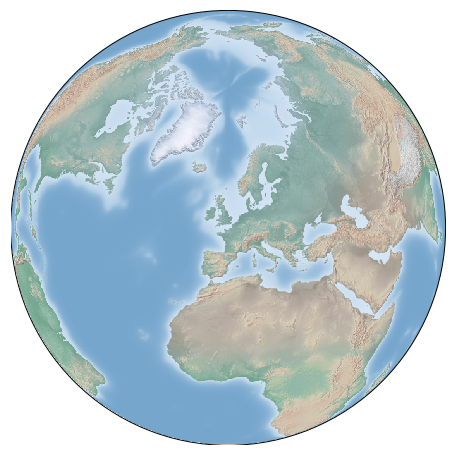

In [16]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='ortho', resolution=None,
lat_0=50, lon_0=0)
draw_map(m);

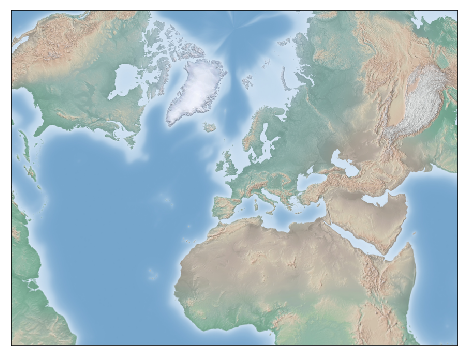

In [17]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
lon_0=0, lat_0=50, lat_1=45, lat_2=55, width=1.6E7, height=1.2E7)
draw_map(m)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/mpl_toolkits/basemap/__init__.py:1704: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch


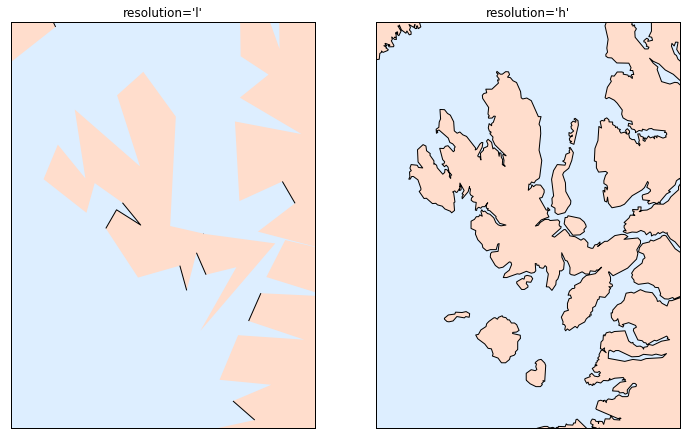

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))
for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
    width=90000, height=120000, resolution=res, ax=ax[i])
    m.fillcontinents(color="#FFDDCC", lake_color='#DDEEFF')
    m.drawmapboundary(fill_color="#DDEEFF")
    m.drawcoastlines()
    ax[i].set_title("resolution='{0}'".format(res));